# Get data from only the time when the surfer is in the water
use the temperature readings from the ocean dataframe to remove all motion and ocean data where the temperature is outside half a standard deviation of the median temperature 

## import ride data

In [16]:
from smartfin_ride_api_v2 import Ride

ride = Ride()
data = ride.get_ride_data('15692')

ride initialized
fetching ride from: https://surf.smartfin.org/ride/15692
fetching ocean data from: https://surf.smartfin.org/media/201811/google_105349665704999793400_0006667E229D_181109191556_Ocean.CSV
fetching motion data from: https://surf.smartfin.org/media/201811/google_105349665704999793400_0006667E229D_181109191556_Motion.CSV


C:\Users\evans\Desktop\Smartfin\smartfin_data_analysis\smartfin_ride_api_v2.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  odf['Time'] = [time / 1000 for time in odf['Time']]


calcualting start_time: 09/11/2018 19:16:03
calcualting end_time: 09/11/2018 20:38:15
retriving CDIP wave heights from: http://thredds.cdip.ucsd.edu/thredds/dodsC/cdip/archive/201p1/201p1_historic.nc
calculating significant wave height between 09/11/2018 19:16:03 - 09/11/2018 20:38:15
calculating significant wave height between 09/11/2018 19:16:03 - 09/11/2018 20:38:15
mean wave height: 0.42014166712760925
mean ocean temp: 19.481172561645508
retrieved nearest CDIP buoy: 201
retrieved CDIP means height for ride: [0.4274497, 0.41283363]
retrieved CDIP means temp for ride: [19.540009, 19.540009, 19.540009, 19.459991, 19.459991, 19.5, 19.5, 19.5, 19.459991, 19.459991, 19.459991, 19.459991, 19.459991, 19.459991, 19.459991, 19.459991, 19.459991]


In [17]:
mdf = data['motion_data']
odf = data['ocean_data']

In [18]:
mdf

,Time,IMU A1,IMU A2,IMU A3,IMU G1,IMU G2,IMU G3,IMU M1,IMU M2,IMU M3,TimeDelta
UTC,,,,,,,,,,,
2018-11-09 19:16:03+00:00,1.414743e+06,9.442731,-8.887277,2.106897,75.00,-124.00,-86.00,-309.00,209.00,39.00,0.00
2018-11-09 19:16:04+00:00,1.414744e+06,9.394847,-6.493075,0.028730,-31.50,-106.00,-100.00,-326.00,181.00,62.00,627.75
2018-11-09 19:16:05+00:00,1.414745e+06,6.086061,-3.466804,-4.304775,-112.75,-552.00,-330.00,-261.25,28.25,240.25,1630.00
2018-11-09 19:16:06+00:00,1.414746e+06,0.804452,-2.480393,-3.294421,-45.75,-299.50,202.50,-50.25,-49.25,314.25,2633.50
2018-11-09 19:16:07+00:00,1.414747e+06,-0.881066,-1.647211,-4.769250,13.25,-42.50,19.75,1.75,-82.75,287.75,3629.50
...,...,...,...,...,...,...,...,...,...,...,...
2018-11-09 20:38:11+00:00,1.419641e+06,9.562441,-9.840169,2.015918,4.00,20.00,-0.75,-289.00,229.50,3.50,4897934.50
2018-11-09 20:38:12+00:00,1.419642e+06,9.595960,-9.969456,1.939303,-37.00,18.00,-5.25,-303.25,262.25,24.75,4898930.50
2018-11-09 20:38:13+00:00,1.419643e+06,9.605537,-10.022128,1.896208,10.25,20.75,1.00,-300.50,262.50,33.50,4899928.75


In [19]:
odf

,Time,Temperature 1,Calibrated Temperature 1,Temperature 1 Stable,Temperature 2,Calibrated Temperature 2,Temperature 2 Stable,TimeDelta
UTC,,,,,,,,
2018-11-09 19:16:03+00:00,1414742.443,375.0,23.438,0.0,5207.0,20.512,0.0,0.0
2018-11-09 19:16:09+00:00,1414748.463,377.0,23.562,0.0,5239.0,20.637,0.0,6020.0
2018-11-09 19:16:15+00:00,1414754.483,375.0,23.438,0.0,5250.0,20.680,0.0,12040.0
2018-11-09 19:16:21+00:00,1414760.504,374.0,23.375,0.0,5250.0,20.680,0.0,18061.0
2018-11-09 19:16:27+00:00,1414766.526,369.0,23.062,0.0,5111.0,20.135,0.0,24083.0
...,...,...,...,...,...,...,...,...
2018-11-09 20:37:49+00:00,1419618.714,450.0,28.125,0.0,6662.0,26.217,0.0,4876271.0
2018-11-09 20:37:55+00:00,1419624.733,449.0,28.062,0.0,6635.0,26.111,0.0,4882290.0
2018-11-09 20:38:01+00:00,1419630.753,448.0,28.000,0.0,6608.0,26.005,0.0,4888310.0


## plot imu and temperature values
as you can see here, there are readings that are obviously recorded when the surfer is out of the water, thus giving us bad temperature and IMU values

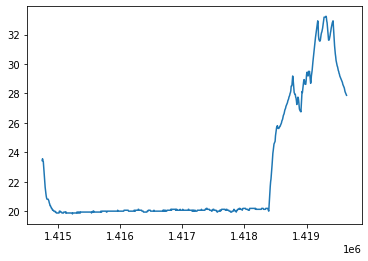

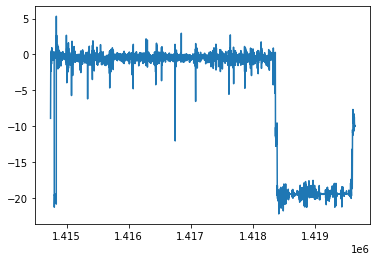

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(odf['Time'], odf['Calibrated Temperature 1'])
plt.show()
plt.plot(mdf['Time'], mdf['IMU A2'])
plt.show()

## Remove readings before entrance in the water

In [27]:
# remove readings from ocean and motion dataframes where surfer is on land before entering the water
def remove_before_entrance(mdf, odf, threshold, med):
    
    # get temperature series
    temps = odf['Calibrated Temperature 1']
    enter_index = get_water_entrance_index(temps, threshold, med)
    
    # get the time where the surfer enters the water in the ocean dataframe
    startTime = odf.iloc[enter_index]['Time']
    
    # find the index in motion dataframe that matches with start index calculated from ocean dataframe
    startIdx = mdf.iloc[(mdf['Time']-startTime).abs().argsort()[:1]]
    return mdf.loc[startIdx.index[0]:], odf.tail(len(odf) - enter_index)
   

# calculate the index in ocean dataframe that the surfer enters the water
def get_water_entrance_index(temps, threshold, med):

    above = False
    count = 0
    consecutiveWithin = 0
    
    # calculate the index at the point where the temperature readings fall within the threshold consecutively
    for time, reading in temps.items():
        if abs(reading - med) < threshold:
            if above == True:
                above = False
            else:
                consecutiveWithin += 1
                
            # if the temperatures fall within the threshold consecutively, then we can assume the surfer is in the water
            if consecutiveWithin > 10:
                return count

            above = False

        else:
            above = True
            consecutiveWithin = 0
        count += 1 
        
    return firstInstance

## remove entries after the surfer exits the water

In [28]:
# remove readings from ocean and motion dataframes where surfer is on land after exiting the water
def remove_after_exit(mdf, odf, threshold, med):

    # get the temperature series
    temps = odf['Calibrated Temperature 1']
    
    # get the index where surfer exits the water
    exit_index = get_water_exit_index(temps, threshold, med)
    
    # get the time where the surfer enters the water in the ocean dataframe
    endTime = odf.iloc[exit_index]['Time']

    # find the index in motion dataframe that matches with end index calculated from ocean dataframe
    endIdx = mdf.iloc[(mdf['Time']-endTime).abs().argsort()[:1]]
    return mdf.loc[:endIdx.index[0]], odf.head(exit_index)
   
    
# calculate the index in ocean dataframe that the surfer enters the water
def get_water_exit_index(temps, threshold, med):
    above = False
    count = 0

    # calculate the index at the last point where the temperature readings transition from within to outside the threshold 
    for time, reading in temps.items():
        if abs(reading - med) > threshold:
            
            # record index where temperature transition from within to outside the threshold
            if above == False:
                above = True
                firstInstance = count
            
            above = True
        
        else:
            above = False
            firstInstance = 0
        count += 1 
    
    return firstInstance

## putting it all together

In [29]:
def get_water_data(mdf, odf):

    temps = odf['Calibrated Temperature 1']
    threshold = temps.std() / 2
    med = temps.median()
    
    mdf, odf = remove_before_entrance(mdf, odf, threshold, med)
    mdf, odf = remove_after_exit(mdf, odf, threshold, med)
    return mdf, odf


mdf = data['motion_data']
odf = data['ocean_data']
mdf, odf = get_water_data(mdf, odf)

In [30]:
mdf

,Time,IMU A1,IMU A2,IMU A3,IMU G1,IMU G2,IMU G3,IMU M1,IMU M2,IMU M3,TimeDelta
UTC,,,,,,,,,,,
2018-11-09 19:17:52+00:00,1.414851e+06,-0.282516,-0.019154,2.317587,-21.50,23.00,2.5,-39.50,-171.00,186.00,107987.70
2018-11-09 19:17:53+00:00,1.414852e+06,0.268151,-0.282516,1.565808,7.00,15.25,16.5,-42.25,-165.25,195.25,108979.75
2018-11-09 19:17:54+00:00,1.414853e+06,-0.215478,-0.057461,1.719037,52.00,35.25,-2.0,-43.75,-171.75,189.75,109982.25
2018-11-09 19:17:55+00:00,1.414854e+06,-0.033519,0.052672,2.279280,10.25,39.50,52.5,-42.75,-169.75,184.75,110982.75
2018-11-09 19:17:56+00:00,1.414855e+06,-0.191536,1.364695,1.302446,-63.25,-45.75,103.0,-92.00,-158.00,209.50,111977.25
...,...,...,...,...,...,...,...,...,...,...,...
2018-11-09 20:17:45+00:00,1.418422e+06,2.509123,-19.785683,-0.172383,-37.75,-13.75,29.5,-280.75,263.75,145.75,3679364.30
2018-11-09 20:17:46+00:00,1.418423e+06,1.999637,-19.115306,-0.379242,-2.20,7.00,-4.2,-272.60,272.20,156.20,3680359.70
2018-11-09 20:17:47+00:00,1.418424e+06,2.034114,-19.460071,-0.471179,18.80,6.20,18.2,-268.00,272.80,156.80,3681355.90


In [31]:
odf

,Time,Temperature 1,Calibrated Temperature 1,Temperature 1 Stable,Temperature 2,Calibrated Temperature 2,Temperature 2 Stable,TimeDelta
UTC,,,,,,,,
2018-11-09 19:17:52+00:00,1414850.803,331.0,20.688,0.0,4996.0,19.684,0.0,108360.0
2018-11-09 19:17:58+00:00,1414856.823,329.0,20.562,0.0,4983.0,19.633,0.0,114380.0
2018-11-09 19:18:04+00:00,1414862.844,328.0,20.500,0.0,4987.0,19.649,0.0,120401.0
2018-11-09 19:18:10+00:00,1414868.864,326.0,20.375,0.0,4990.0,19.661,0.0,126421.0
2018-11-09 19:18:16+00:00,1414874.884,326.0,20.375,0.0,4994.0,19.676,0.0,132441.0
...,...,...,...,...,...,...,...,...
2018-11-09 20:17:19+00:00,1418396.622,327.0,20.438,0.0,5044.0,19.872,0.0,3654179.0
2018-11-09 20:17:25+00:00,1418402.642,335.0,20.938,0.0,5153.0,20.300,0.0,3660199.0
2018-11-09 20:17:31+00:00,1418408.662,342.0,21.375,0.0,5249.0,20.676,0.0,3666219.0


## plots
as you can see, the sections of data before and after the ride where the temperatures and imu values were way off are pretty much all gone now

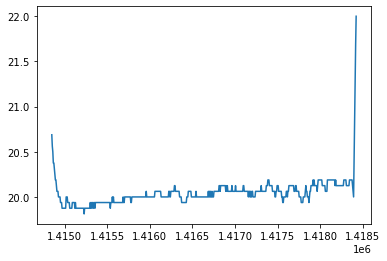

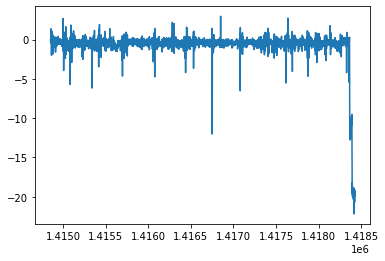

In [32]:
plt.plot(odf['Time'], odf['Calibrated Temperature 1'])
plt.show()
plt.plot(mdf['Time'], mdf['IMU A2'])
plt.show()